# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

In [1]:
# In this project, we will learn how to build and train classifier models using Scikit-Learn library. Scikit-learn
# is a free machine learning library developed for python. Scikit-learn offers several algorithms for
# classification, regression, and clustering. Several famous models included such as support vector machines, random
# forests, gradient boosting, and k-means.

# TASK #2: IMPORT LIBARIES AND DATASETS

In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [5]:
# read the csv file 
df = pd.read_csv("cardio_train.csv", sep=";")

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# Here we have the patient id, we also have the age of the patient, And then we see the gender column, the height,
# the weight. We also see the cholesterol level as well, their glucose level too. We also have the smoke whether the
# patient smokes or not. The alcohol intake, whether they are active or not. We also have their blood pressure high
# and low. And also the cardio meaning, whether the patient has a cardiovascular disease or not. Here we have bunch
# of inputs to our model, and cardio is going to be the output of our model. Basically, i want to predict based on
# all these different features whether the patient has cardiovascular disease or not. And because the output is
# either zero or one, basically its a simple binary classification problem.

# Now, let's figure out how to handle these numbers.

- **Display the last 5, 8, and 10 rows in the df DataFrame**

In [13]:
df.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [15]:
df.tail(8)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [17]:
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [19]:
# First, i want to drop the id column, since its kind of useless for us since its just a unique identifier of
# patient, thats why we will not use it to train our machine learning model, so we will drop it

In [21]:
# Drop id
df = df.drop(columns = 'id')

In [23]:
# Check if the id column is removed
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [25]:
# Now, maybe youre asking why is age column in thousands? Well, obviously, its because age here is in days format.
# lets convert the age column from days to years simply by dividing that column to 365. Then override the age column
# again.

In [27]:
# since the age is given in days, we convert it into years
df['age'] = df['age']/365

In [29]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
# Now we have a reasonable age, like 50 years old, 55 years old, 51, 48, 47 and so on. Now lets go ahead and plot
# the statistical summary about our data.

In [35]:
# Statistical summary of the dataframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# We can see that we have the count which is how many samples we have in every column in the data. So, basically we
# have 70,000 samples. We also have the average age considered in this study which is 53 years old as an example.
# We also have the standard deviation which is the dispersion away from the mean. We also have the minimum age which
# is 29 years old. The maximum age which is 64 years old. We also have the 25th, 50th, and 75th percentile as well.
# We can also see the ap_hi and ap_lo, basically the blood pressure high and low. We can also see hte cholesterol
# level, glucose, smoke, and so on.

# Next, let's plot the histogram of every column that we have in the data.

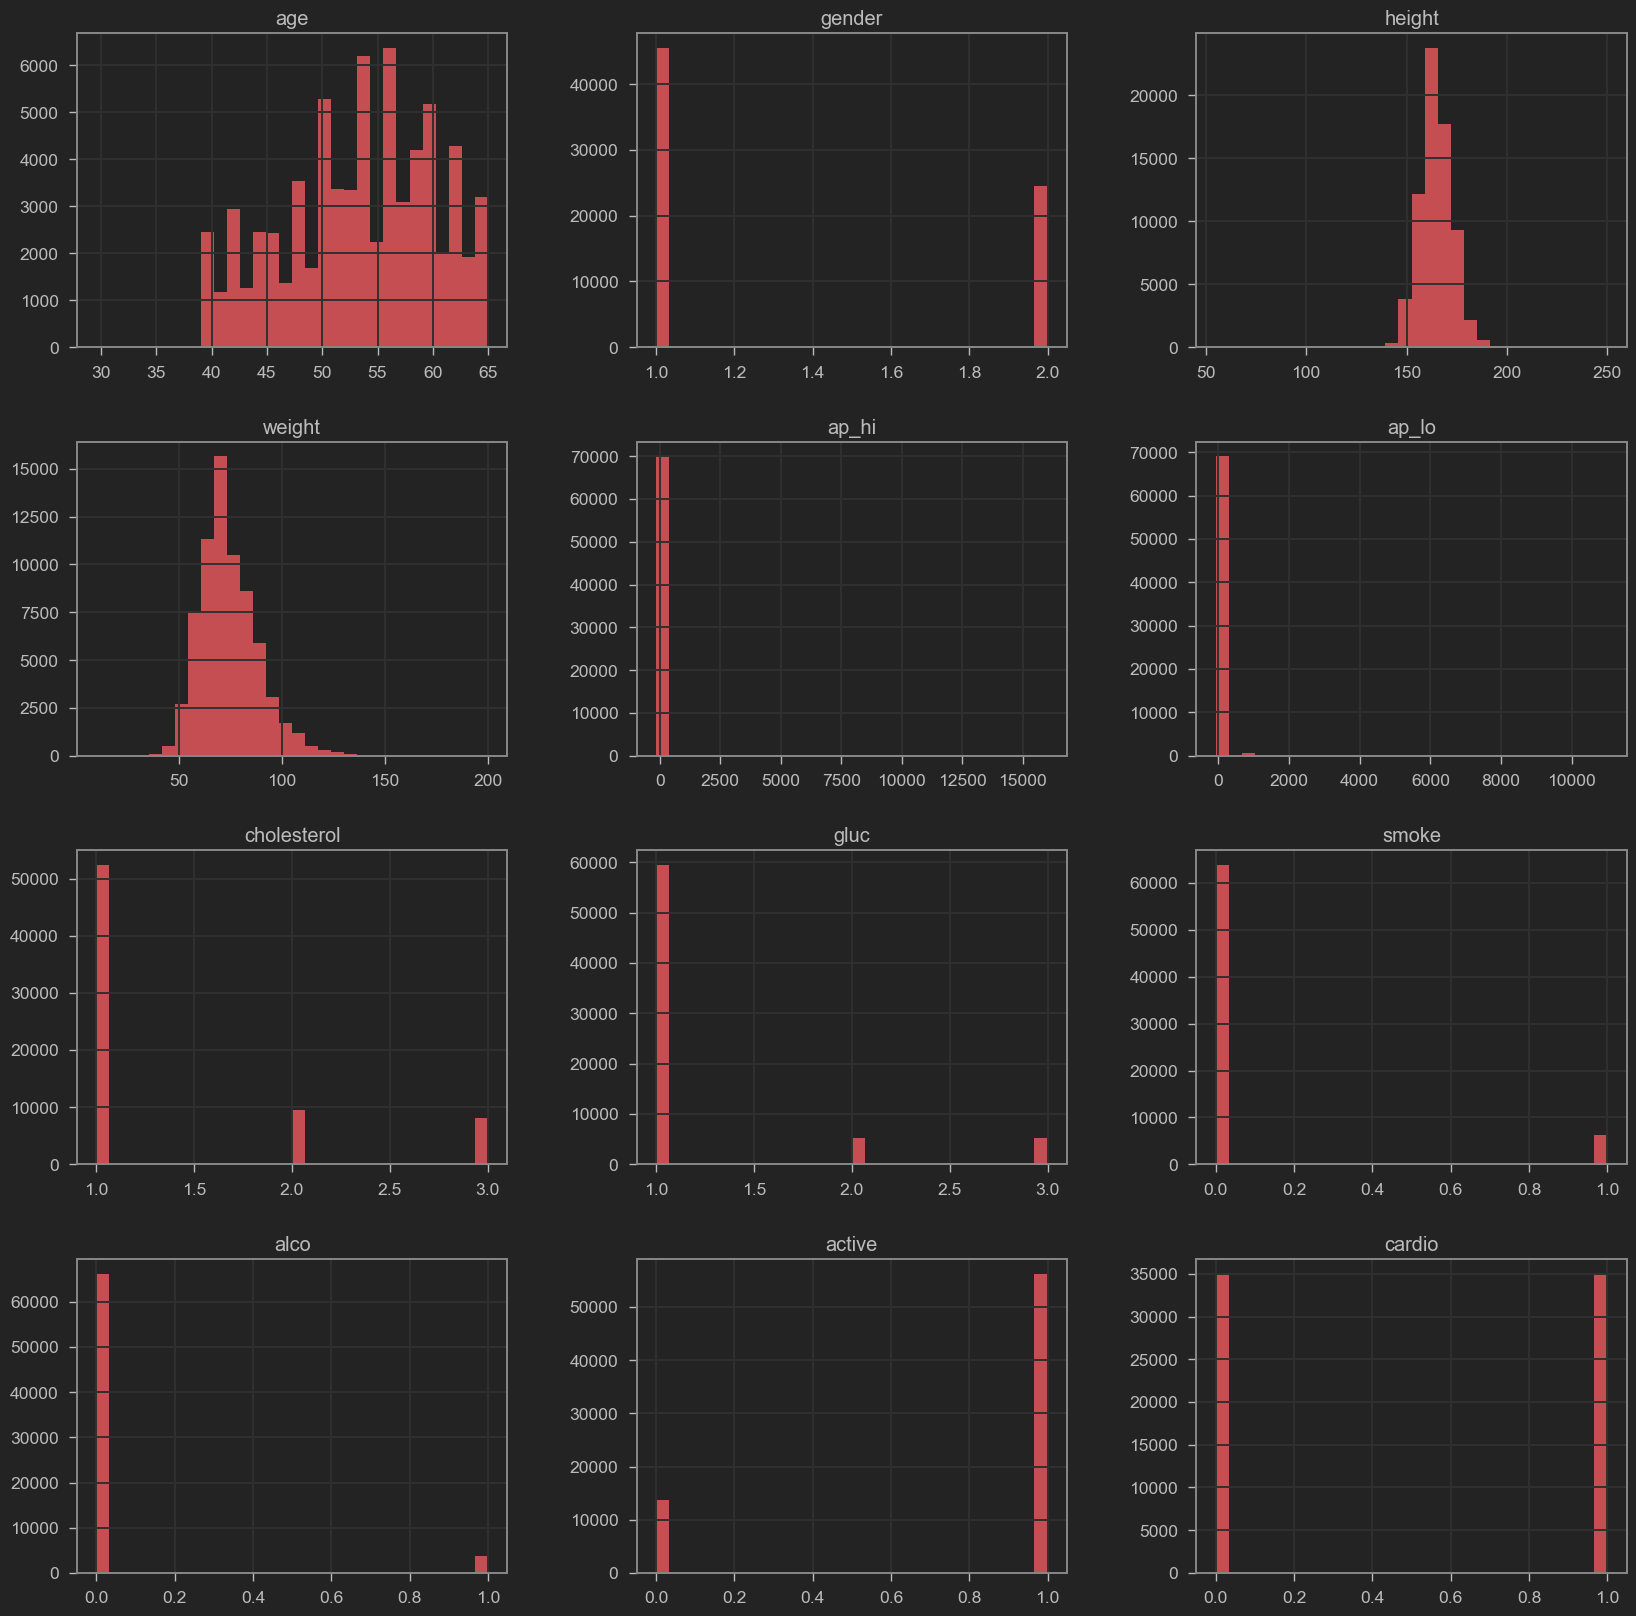

In [39]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [41]:
# Here, we can see the distribution of the people who are active versus people who are not active. So there are more
# people that are active than those who are not. We can also see the alcohol intake, people who drink and not drink
# alcohol, there are more people who dont drink than those who drink alcohol. We can also see the cardio, which is
# our output or target class and it looks like we have a balanced dataset, meaning the number of people who did not
# have a cardiovascular disease is equal to the number of people who did in fact had a cardiovascular disease. We
# can also see here the cholesterol level, the smoking habits as well, like how many people smoke? and how many
# people who dont smoke? and so on. We can also see the height and weight distribution as well.

In [43]:
# get the correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [45]:
# We can easily observe the diagonal here, we can see a perfect 1 correlation since each column is perfectly
# correlated with itself. Its hard to see whether we have a strong positive correlation but we can see that there
# are positive correlation and negative correlation. So we will plot it so we can see it better by adding colors to
# it.

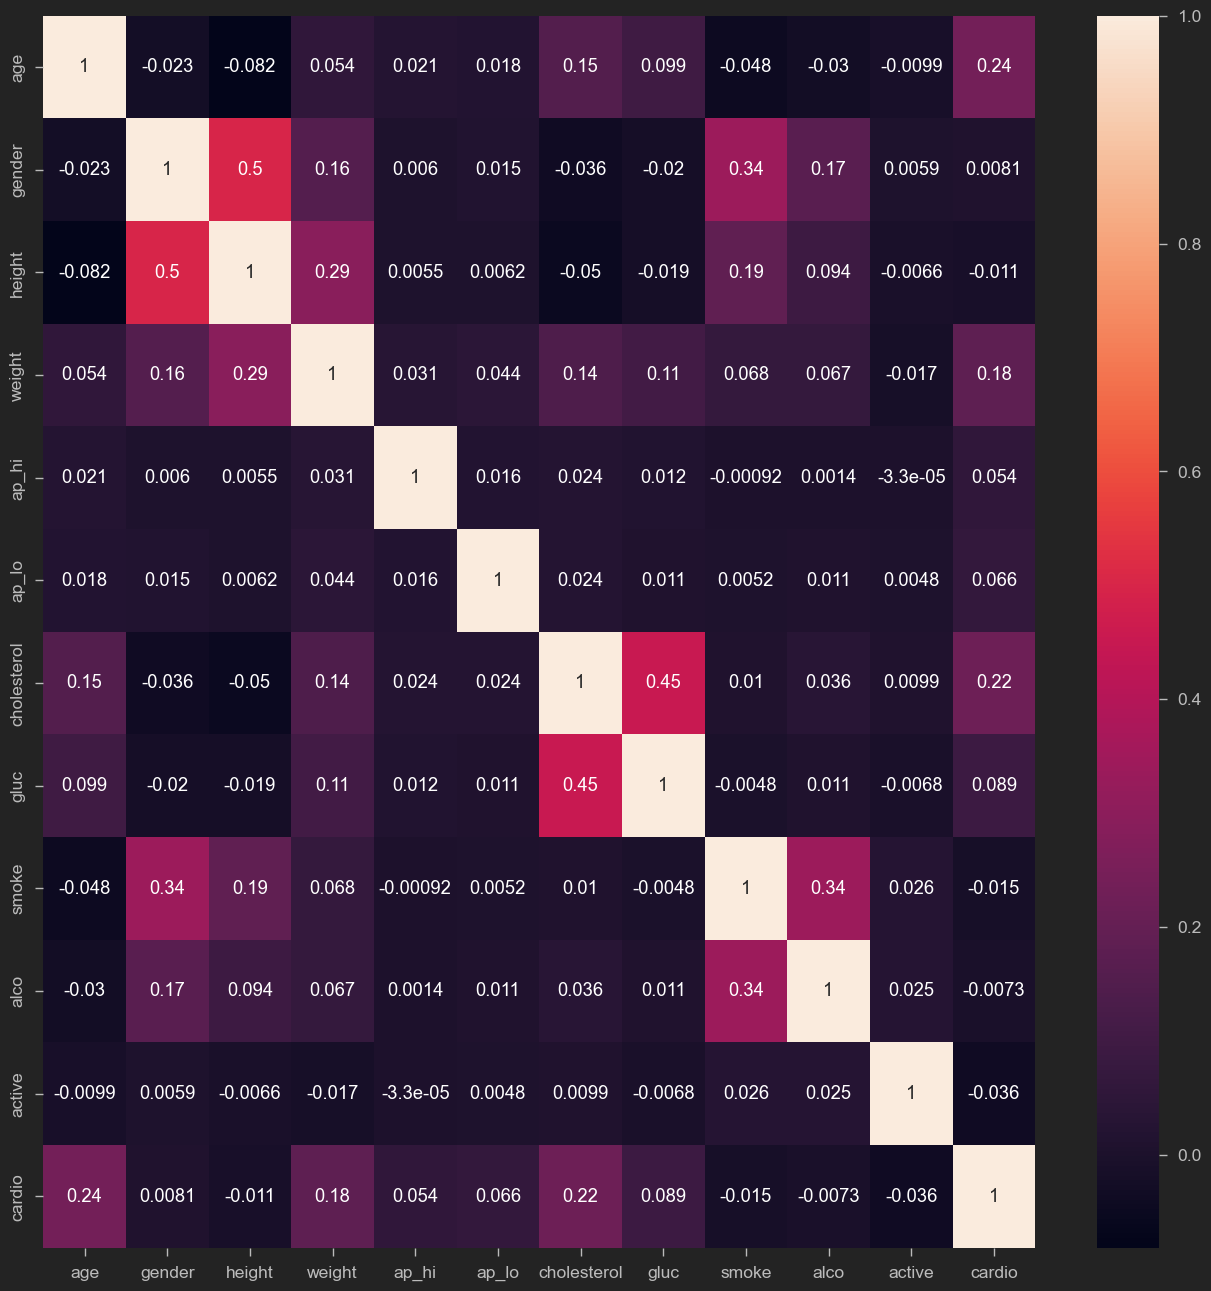

In [47]:
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [49]:
# Now, we got a much better view of our correlation matrix. So, for example, we can see that we have a strong
# positive correlation between glucose and cholesterol level. We can also see that there is a positive correlation
# between the height and gender. As I said earlier, we can also see that there is a perfect positive correlation
# between the elements in the diagonal, and all of them are one, which makes sense. We can also see a correlation at
# 0.29 between the weight and height of the patients.

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [51]:
# Now, lets prepare our data for machine learning model training. Let's split the data into inputs and outputs. Use
# all the columns as inputs except the cardio column because that will be our output variable.

In [53]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [55]:
# split the dataframe into target and features
y = df['cardio']
X = df.drop(columns =['cardio'])

In [57]:
X.shape

(70000, 11)

In [59]:
y.shape

(70000,)

In [61]:
# Now, lets split our data 80% to training and 20% to testing. This is kind of a general guideline or best practices
# that we do when we train any machine learning model, we basically use the majority of the data to train the model
# and then once the model is trained we wanted to evaluate that model performance using an independent testing
# dataset. Note that this independent dataset, is also called hold out dataset, a kind of data that has never been
# seen by the model during the training phase. Let's do the splitting.

In [63]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [65]:
X_train.shape

(56000, 11)

In [67]:
y_train.shape

(56000,)

In [69]:
X_test.shape

(14000, 11)

In [71]:
y_test.shape

(14000,)

In [73]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
37300,57.394521,1,158,91.0,140,90,3,3,0,0,0
4908,48.008219,1,158,83.0,130,90,3,2,0,0,0
48825,57.830137,1,168,65.0,140,100,1,1,0,0,0
40044,49.805479,2,170,75.0,150,90,1,1,0,0,1
23427,43.476712,1,169,70.0,120,80,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25160,55.909589,2,159,67.0,120,80,1,1,1,0,0
26791,51.824658,1,170,81.0,160,100,3,2,0,0,1
19211,59.372603,2,183,78.2,150,95,3,1,1,1,1
55835,59.994521,2,183,81.0,140,90,3,1,1,1,0


In [75]:
# We can notice something quite interesting in here. We can see that first, we have a 56,000 samples which is pretty
# good, and 11 columns, but on the left hand side we can see that the index here has been shuffled. Its all over the
# place. Thats part of SKlearn train_test_split function. It basically split the data and it also shuffles the data
# as well. It just changed the order of the data. And this is quite important because when  we train the machine
# learning model, we want to make sure that model does not learn the dependency or the order of the data, and thats
# why we're shuffling it here. So when we feed it in the machine learning model, the model is not gonna learn the
# order of the data that these patients maybe are grouped together or something along those lines. That's why by
# default train_test_split shuffles the data as well. You can also disable that by setting the attribute by setting
# it to false and the function will avoid shuffling the data and will keep it in its raw original order.

# TASK #5: UNDERSTAND XG-BOOST ALGORITHM TO SOLVE CLASSIFICATION TYPE PROBLEMS

In [78]:
# XG-Boost repeatedly builds new models and combine them into an ensemble model. Think about it from a very high
# level. XG-Boost works by trying to learn from the previous mistakes that the previous or old models have made.
# Basically, what we do is get the data and then we start by training a very basic tree based model initially, then
# we're going to train the model and because the model right now is quite new, it has seen the data for the first
# time, it will generate a large values of error. We call these error, residuals. So thats the first step. Next, is
# to calculate the error or the residuals based on the previous model, based on the initial model that we created.
# Then we train another model that basically try to predict those residuals. The new model is gonna back and try to
# predict the errors or the residuals from the previous model. Its like now, we're actually learning from the
# previous mistakes that the previous model has done. And then what we're gonna do is add last model to the ensemble.
# Its like we're building so many trees, so many models and all these models are learning from each other and
# building on the mistakes that the previous models have performed.

# XGBoost is superior compared to gradient boosting algorithm since it offers a good balance between bias and
# variance (Gradient boosting only optimized for the variance so tend to overfit training data while XGBoost offers
# regularization terms that can improve model generalization).

# TASK #6: TRAIN AN XG-BOOST CLASSIFIER IN SK-LEARN

In [80]:
from xgboost import XGBClassifier

In [82]:
# Train an XGBoost classifier model 

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 1, n_estimators = 10)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

# TASK #7: TEST XGBOOST CLASSIFIER TO PERFORM INFERENCE

In [84]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7086428571428571


In [86]:
# We can see that the model has been able to achieve around 71% accuracy.

In [88]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)
y_predict

array([1, 1, 0, ..., 1, 0, 1])

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.68      0.80      0.73      7008
           1       0.76      0.62      0.68      6992

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



In [92]:
# Now, we are able to obtain additional metrics, for example we have the precision here, the recall, also the F1 
# score which is the harmonic mean between precision and recall, and also the overall accuracy of the model at
# around 71%.

<Axes: >

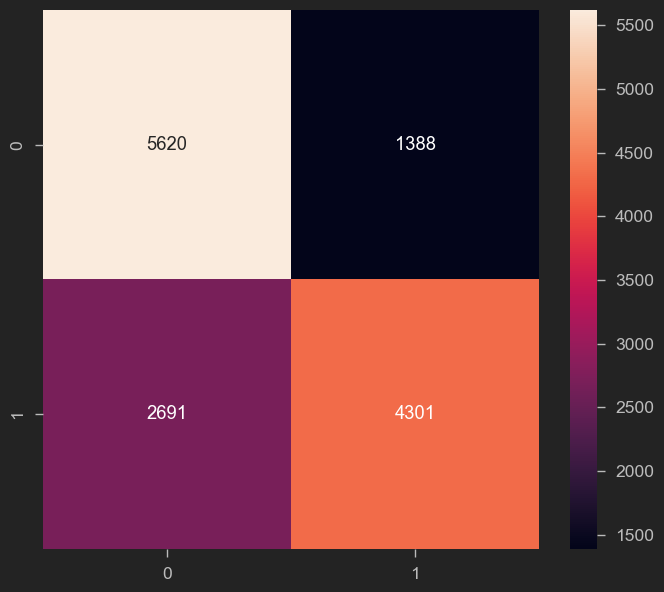

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

In [96]:
# What we have here is the confusion matrix that shows the overall number of samples that have been correctly
# classified and the number of samples that have been misclassified. Based on the confusion matrix, the model was
# able to correctly classify 5,620 individuals without cardiovascular disease and 4,301 individuals with
# cardiovascular disease, which shows that it performs reasonably well overall. However, there were 1,388 cases
# where healthy individuals were incorrectly predicted as having the disease, which may lead to unnecessary
# follow-up tests. More importantly, the model failed to identify 2,691 individuals who actually have
# cardiovascular disease, meaning these cases were missed by the model. This explains why the recall for the
# positive class is relatively low, as the model only detects about 62% of actual disease cases. Although the
# precision is fairly good, indicating that most positive predictions are correct, the number of missed cases is
# still a concern. While the overall accuracy is 71%, accuracy alone is not enough in a medical setting. Since
# missing a cardiovascular disease case can have serious consequences, the model still needs improvement,
# particularly in increasing its ability to correctly detect patients with the disease.

- **Try a larger max_depth and retrain the model**
- **Assess the performance of the trained model**
- **What do you conclude?**

In [99]:
# Train an XGBoost classifier model 

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 8, n_estimators = 10)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [101]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7300714285714286


In [103]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)
y_predict

array([0, 1, 0, ..., 0, 0, 1])

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0. 


              precision    recall  f1-score   support

           0       0.71      0.77      0.74      7008
           1       0.75      0.69      0.72      6992

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



<Axes: >

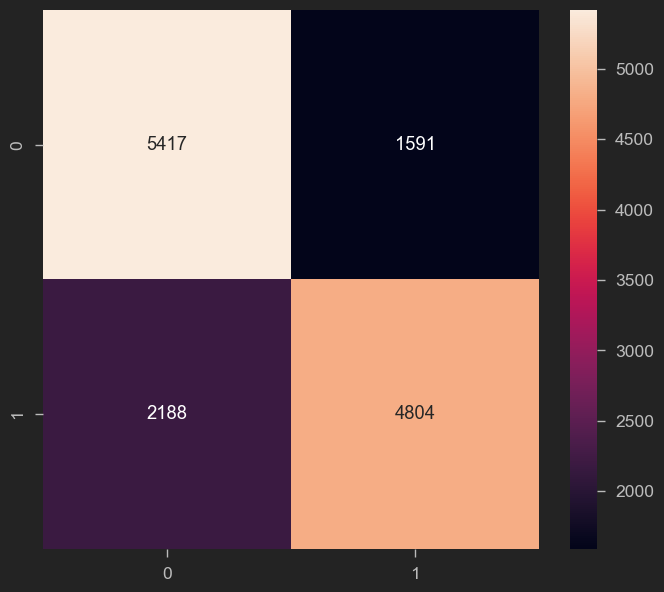

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

In [109]:
# Changing the max_depth hyperparameter to 8, the model accuracy has actually increased by 2%. So, we are at 73%.
# That basically seems that when you increase the max_depth of the tree, well, the tree become a little bit more
# complex, so now it was able to model the complexity that we have in our data. If we have a tree that only has one
# depth, that means its a very shallow tree. It wasnt able to capture all the non linearity and complexity that we
# have in the data. Note that it doesnt work that as if you increase the max_depth, you always improve the
# performance. Because sometimes you might overfit the data, and will fail to generalize it to testing data.

# EXCELLENT JOB!